# 📊 Factory Production Optimization

This notebook demonstrates how to solve a **business optimization problem** using **Linear Programming** and the **PuLP** Python library.

### 🧠 Problem Statement:

A factory produces **two products**: A and B.

| Resource       | Product A | Product B | Total Available |
|----------------|-----------|-----------|-----------------|
| Labor Hours    | 2 hours   | 3 hours   | 100 hours       |
| Raw Materials  | 3 units   | 2 units   | 90 units        |
| Profit per Unit| $40       | $50       | —               |

Our goal is to **maximize total profit** while staying within the labor and material limits.

In [4]:
%pip install -q pulp
from pulp import LpMaximize, LpProblem, LpVariable, value

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Create LP model
model = LpProblem(name="factory-production", sense=LpMaximize)

# Decision Variables: x = units of A, y = units of B
x = LpVariable(name="Product_A_units", lowBound=0)
y = LpVariable(name="Product_B_units", lowBound=0)

# Objective: Maximize Profit
model += 40 * x + 50 * y, "Total_Profit"

# Constraints
model += 2 * x + 3 * y <= 100, "Labor_hours"
model += 3 * x + 2 * y <= 90, "Raw_materials"

# Solve the model
model.solve()

1

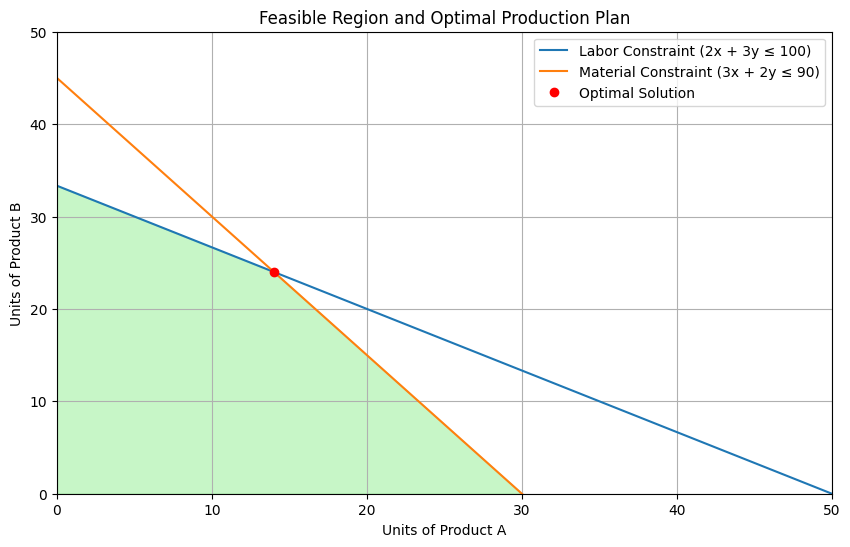

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define ranges
x_vals = np.linspace(0, 60, 200)
labor_line = (100 - 2 * x_vals) / 3
material_line = (90 - 3 * x_vals) / 2

plt.figure(figsize=(10, 6))
plt.plot(x_vals, labor_line, label="Labor Constraint (2x + 3y ≤ 100)")
plt.plot(x_vals, material_line, label="Material Constraint (3x + 2y ≤ 90)")

# Feasible Region Shading
plt.fill_between(x_vals, 0, np.minimum(labor_line, material_line), where=(labor_line >= 0) & (material_line >= 0), color='lightgreen', alpha=0.5)

# Optimal point
plt.plot(x.varValue, y.varValue, "ro", label="Optimal Solution")

plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("Units of Product A")
plt.ylabel("Units of Product B")
plt.title("Feasible Region and Optimal Production Plan")
plt.legend()
plt.grid(True)
plt.show()

## 🔍 Business Insights

- The constraints intersect at the optimal point, utilizing resources efficiently.
- This method can be extended to 3+ products and more constraints.
- Decision-makers can use such models to guide production planning.